In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip
from qutip import destroy

In [2]:
# Constants
E_J = 20e9                                           # Josephson energy in Hz
w = 5e9                                              # Angular frequency (in Hz)
Delta = -300e6                                       # Anharmonicity (Delta)
N_phis = 101                                         # Number of flux points to sample
phis = np.linspace(-np.pi, np.pi, N_phis)

In [3]:
def harmonic_oscillator_potential(phis, E_J, w):
    return 0.5 * E_J * phis**2 / w

In [4]:
def transmon_potential(phis, E_J, Delta):
    return (E_J - E_J * np.cos(phis)) / w

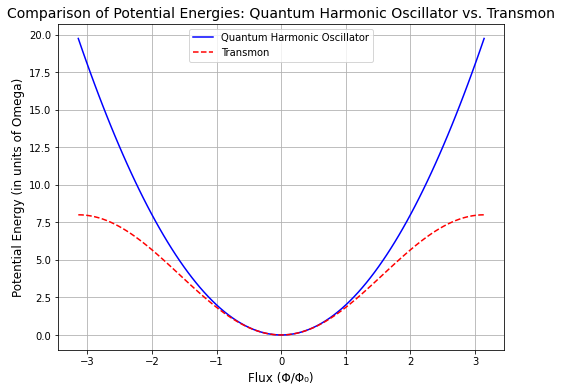

In [5]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(phis, harmonic_oscillator_potential(phis, E_J, w), label='Quantum Harmonic Oscillator', color='blue')
ax.plot(phis, transmon_potential(phis, E_J, Delta), label='Transmon', color='red', linestyle='--')
ax.set_xlabel('Flux (Φ/Φ₀)', fontsize=12)
ax.set_ylabel('Potential Energy (in units of Omega)', fontsize=12)
ax.set_title('Comparison of Potential Energies: Quantum Harmonic Oscillator vs. Transmon', fontsize=14)
ax.legend()
ax.grid(True)
plt.show()

In [6]:
# Constants
w = 5e9                                                 # Angular frequency (in Hz)
Delta = -300e6                                          # Anharmonicity (Delta)
N = 35                                                  # Number of energy levels considered
N_energies = 5                                         # Number of lowest energy states to calculate

c = destroy(N)

In [7]:
def hamiltonian_QHO(c, w, N_energies):
    H_QHO = w * c.dag() * c
    E_QHO = H_QHO.eigenenergies()[0:N_energies]
    return E_QHO

In [8]:
def hamiltonian_transmon(c, w, Delta, N_energies):
    H_transmon = w * c.dag() * c + (Delta / 2) * (c.dag() * c) * (c.dag() * c - 1)
    E_transmon = H_transmon.eigenenergies()[0:2 * N_energies]
    return E_transmon

In [9]:
print("Lowest energy levels of the Quantum Harmonic Oscillator:")
print(hamiltonian_QHO(c, w, N_energies))

print("\nLowest energy levels of the Transmon:")
print(hamiltonian_transmon(c, w, Delta, N_energies))

Lowest energy levels of the Quantum Harmonic Oscillator:
[0.0e+00 5.0e+09 1.0e+10 1.5e+10 2.0e+10]

Lowest energy levels of the Transmon:
[0.00e+00 1.70e+09 5.00e+09 6.60e+09 9.70e+09 1.12e+10 1.41e+10 1.55e+10
 1.82e+10 1.95e+10]


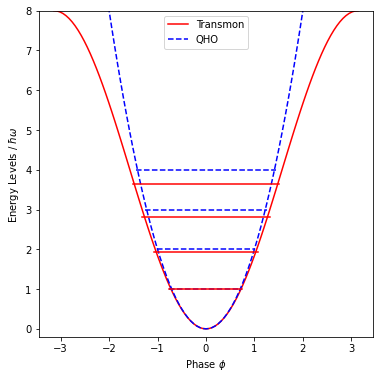

In [10]:
fig, axes = plt.subplots(1, 1, figsize=(6, 6))

axes.plot(phis, transmon_potential(phis, E_J, Delta), '-', color='red', label='Transmon')
axes.plot(phis, harmonic_oscillator_potential(phis, E_J, w), '--', color='blue', label='QHO')

for eidx in range(1, N_energies):
    delta_E_QHO = (hamiltonian_QHO(c, w, N_energies)[eidx] - hamiltonian_QHO(c, w, N_energies)[0]) / w
    delta_E_transmon = (hamiltonian_transmon(c, w, Delta, N_energies)[2 * eidx] - hamiltonian_transmon(c, w, Delta, N_energies)[0]) / w
    QHO_lim_idx = np.where(harmonic_oscillator_potential(phis, E_J, w)[int(N_phis / 2):N_phis] > delta_E_QHO)[0]
    trans_lim_idx = np.where(transmon_potential(phis, E_J, Delta)[int(N_phis / 2):N_phis] > delta_E_transmon)[0]
    
    if len(QHO_lim_idx) > 0:
        QHO_lim_idx = QHO_lim_idx[0]
    else:
        QHO_lim_idx = N_phis - 1
    
    if len(trans_lim_idx) > 0:
        trans_lim_idx = trans_lim_idx[0]
    else:
        trans_lim_idx = N_phis - 1
    axes.plot([phis[N_phis // 2 - QHO_lim_idx], phis[N_phis // 2 + QHO_lim_idx]], 
              [delta_E_QHO, delta_E_QHO], '--', color='blue')
    axes.plot([phis[N_phis // 2 - trans_lim_idx], phis[N_phis // 2 + trans_lim_idx]], 
              [delta_E_transmon, delta_E_transmon], '-', color='red')

axes.set_xlabel('Phase $\phi$')
axes.set_ylabel('Energy Levels / $\hbar\omega$')
axes.set_ylim(-0.2, 8)
axes.legend(loc=9)
plt.show()